In [96]:
# First we need to install packages that aren't already present. 
if (!require("pacman")) install.packages("pacman")
pacman::p_load(devtools, ggtern, ggplot2, reshape2, survival, data.table)

# We load the data. 
df <- data.frame(
    fread("../data_after_prep.csv"))
df$age <- df$broadAgeGroup

# A basic analysis of weekend-warriorness and incident CVD

In [97]:
head(df$broadAgeGroup)

[1] "61-70" "71-80" "41-50" "51-60" "61-70" "51-60"

In [98]:
head(df$ageAccInt)

[1] 70 74 50 60 67 55

In [99]:
colnames(df)

[1] "eid"                                  
  [2] "V1"                                   
  [3] "file.name"                            
  [4] "file.size"                            
  [5] "file.deviceID"                        
  [6] "calibration.errsBefore.mg."           
  [7] "calibration.errsAfter.mg."            
  [8] "calibration.xOffset.g."               
  [9] "calibration.yOffset.g."               
 [10] "calibration.zOffset.g."               
 [11] "calibration.xSlope.g."                
 [12] "calibration.ySlope.g."                
 [13] "calibration.zSlope.g."                
 [14] "calibration.xTemp.C."                 
 [15] "calibration.yTemp.C."                 
 [16] "calibration.zTemp.C."                 
 [17] "calibration.meanDeviceTemp.C."        
 [18] "calibration.numStaticPoints"          
 [19] "calibration.staticXmin.g."            
 [20] "calibration.staticXmax.g."            
 [21] "calibration.staticYmin.g."            
 [22] "calibration.staticYmax.g."            
 [23] "calibration.staticZmin.g."            
 [24] "calibration.staticZmax.g."            
 [25] "quality.calibratedOnOwnData"          
 [26] "quality.goodCalibration"              
 [27] "file.startTime"                       
 [28] "file.endTime"                         
 [29] "file.firstDay.0.mon.6.sun."           
 [30] "errs.interrupts.num"                  
 [31] "errs.interrupt.mins"                  
 [32] "wearTime.numNonWearEpisodes..1hr."    
 [33] "wearTime.overall.days."               
 [34] "nonWearTime.overall.days."            
 [35] "wearTime.mon.hrs."                    
 [36] "wearTime.tue.hrs."                    
 [37] "wearTime.wed.hrs."                    
 [38] "wearTime.thur.hrs."                   
 [39] "wearTime.fri.hrs."                    
 [40] "wearTime.sat.hrs."                    
 [41] "wearTime.sun.hrs."                    
 [42] "wearTime.hourOfDay0..hrs."            
 [43] "wearTime.hourOfDay1..hrs."            
 [44] "wearTime.hourOfDay2..hrs."            
 [45] "wearTime.hourOfDay3..hrs."            
 [46] "wearTime.hourOfDay4..hrs."            
 [47] "wearTime.hourOfDay5..hrs."            
 [48] "wearTime.hourOfDay6..hrs."            
 [49] "wearTime.hourOfDay7..hrs."            
 [50] "wearTime.hourOfDay8..hrs."            
 [51] "wearTime.hourOfDay9..hrs."            
 [52] "wearTime.hourOfDay10..hrs."           
 [53] "wearTime.hourOfDay11..hrs."           
 [54] "wearTime.hourOfDay12..hrs."           
 [55] "wearTime.hourOfDay13..hrs."           
 [56] "wearTime.hourOfDay14..hrs."           
 [57] "wearTime.hourOfDay15..hrs."           
 [58] "wearTime.hourOfDay16..hrs."           
 [59] "wearTime.hourOfDay17..hrs."           
 [60] "wearTime.hourOfDay18..hrs."           
 [61] "wearTime.hourOfDay19..hrs."           
 [62] "wearTime.hourOfDay20..hrs."           
 [63] "wearTime.hourOfDay21..hrs."           
 [64] "wearTime.hourOfDay22..hrs."           
 [65] "wearTime.hourOfDay23..hrs."           
 [66] "wearTime.diurnalHrs"                  
 [67] "wearTime.diurnalMins"                 
 [68] "quality.goodWearTime"                 
 [69] "acc.ecdf.1.0mg"                       
 [70] "acc.ecdf.2.0mg"                       
 [71] "acc.ecdf.3.0mg"                       
 [72] "acc.ecdf.4.0mg"                       
 [73] "acc.ecdf.5.0mg"                       
 [74] "acc.ecdf.6.0mg"                       
 [75] "acc.ecdf.7.0mg"                       
 [76] "acc.ecdf.8.0mg"                       
 [77] "acc.ecdf.9.0mg"                       
 [78] "acc.ecdf.10.0mg"                      
 [79] "acc.ecdf.11.0mg"                      
 [80] "acc.ecdf.12.0mg"                      
 [81] "acc.ecdf.13.0mg"                      
 [82] "acc.ecdf.14.0mg"                      
 [83] "acc.ecdf.15.0mg"                      
 [84] "acc.ecdf.16.0mg"                      
 [85] "acc.ecdf.17.0mg"                      
 [86] "acc.ecdf.18.0mg"                      
 [87] "acc.ecdf.19.0mg"                      


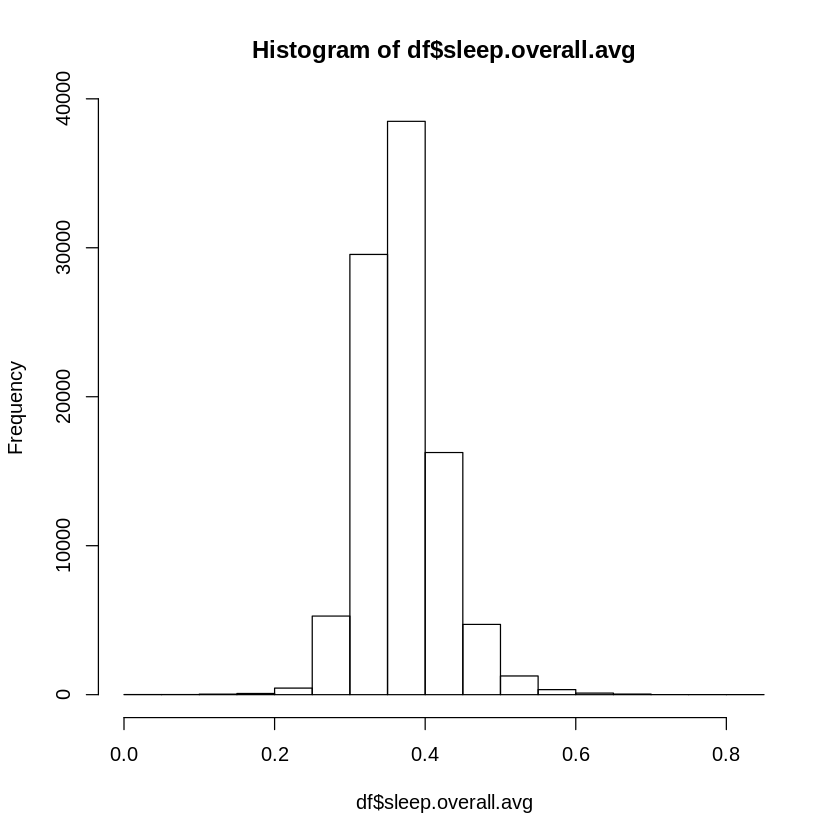

In [100]:
hist(df$sleep.overall.avg)

# Var selection 

In [101]:
demo_list = c('testCen', 'fu_time', 'cvd_event', 'shiftWork', 'education', 'broadAgeGroup', 'ageAccInt', 'sex', 'diastolicBP', 'systolicBP', 'ethnicity', 'smoking', 
              'alcohol', 'bmi', 'overallHealthRating', 'died')
collist = c('light.overall.avg',
            'light.weekday.avg',
            'light.weekend.avg',
            'light.mon.avg',
            'light.tue.avg',
            'light.wed.avg',
            'light.thur.avg',
            'light.fri.avg',
            'light.sat.avg',
            'light.sun.avg',
            'moderate.overall.avg', 'moderate.overall.sd', 'moderate.weekday.avg', 'moderate.weekend.avg', 'moderate.mon.avg', 'moderate.tue.avg', 'moderate.wed.avg', 'moderate.thur.avg', 'moderate.fri.avg', 'moderate.sat.avg', 'moderate.sun.avg',
            'MET.overall.avg', 'MET.overall.sd', 'MET.weekday.avg', 'MET.weekend.avg', 'MET.mon.avg', 'MET.tue.avg', 'MET.wed.avg', 'MET.thur.avg', 'MET.fri.avg', 'MET.sat.avg', 'MET.sun.avg',
            'sedentary.overall.avg', 'sedentary.overall.sd', 'sedentary.weekday.avg', 'sedentary.weekend.avg', 'sedentary.mon.avg', 'sedentary.tue.avg', 'sedentary.wed.avg', 'sedentary.thur.avg', 'sedentary.fri.avg', 'sedentary.sat.avg', 'sedentary.sun.avg',
            'vigorous.weekend.avg', 'vigorous.mon.avg', 'vigorous.tue.avg', 'vigorous.wed.avg', 'vigorous.thur.avg', 'vigorous.fri.avg', 'vigorous.sat.avg', 'vigorous.sun.avg', 'vigorous.overall.avg')
var_list = c(demo_list, collist)
df <- df[df$prevalent_cvd == 0, ]
df <- df[var_list]
df <- df[complete.cases(df), ]

# Set threshold

In [102]:
nrow(df[complete.cases(df), ])

[1] 82648

In [103]:
ref_percents = c(39947, 14224, 2341, 7079)
ref_percents = ref_percents/sum(ref_percents)

In [104]:
ref_percents

[1] 0.62818638 0.22367945 0.03681339 0.11132078

In [105]:
density(df$vigorous.weekend.avg )


Call:
	density.default(x = df$vigorous.weekend.avg)

Data: df$vigorous.weekend.avg (82648 obs.);	Bandwidth 'bw' = 0.0005059

       x                   y           
 Min.   :-0.001518   Min.   :  0.0000  
 1st Qu.: 0.049241   1st Qu.:  0.0000  
 Median : 0.100000   Median :  0.0000  
 Mean   : 0.100000   Mean   :  4.9159  
 3rd Qu.: 0.150759   3rd Qu.:  0.0011  
 Max.   : 0.201518   Max.   :657.1291  

In [106]:
ref_percents
quantile(df$vigorous.weekend.avg, probs=ref_percents)

[1] 0.62818638 0.22367945 0.03681339 0.11132078

62.81864% 22.36795% 3.681339% 11.13208% 
        0         0         0         0

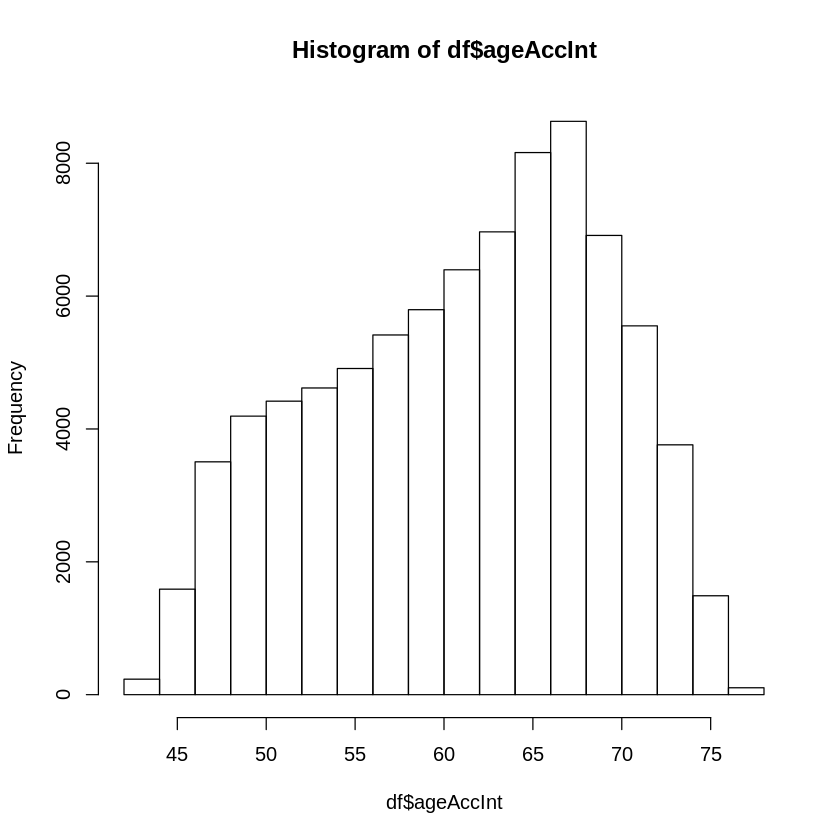

In [107]:
hist(df$ageAccInt)

In [108]:
# set tresholds 
active_threshold = 1000/(7*24*60)

In [124]:
df$active <- ((df$vigorous.overall.avg+ df$moderate.overall.avg) >  active_threshold) 

In [125]:
# count #
(nrow(df)-sum(df$active))/nrow(df)

[1] 0.8021852

In [126]:
# count #
sum(df$active)

[1] 16349

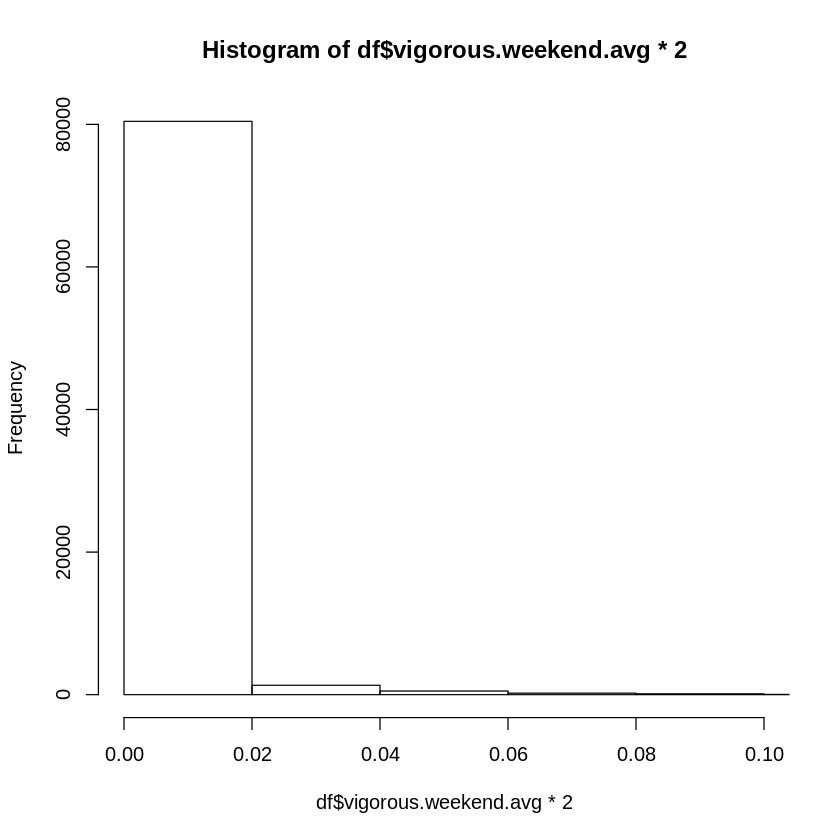

In [112]:
hist(df$vigorous.weekend.avg*2, xlim = range(0, 0.1))

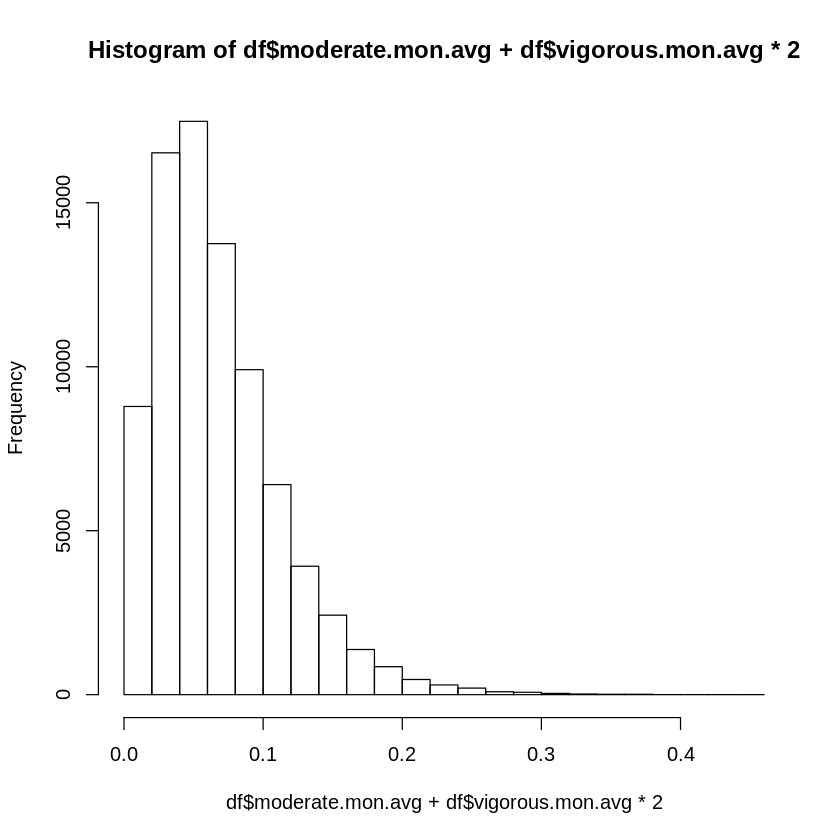

In [113]:
hist(df$moderate.mon.avg + df$vigorous.mon.avg*2)

In [114]:
session_threshold

[1] 0.1

In [115]:
(16*0.15)/24

[1] 0.1

In [116]:
session_threshold = 0.1

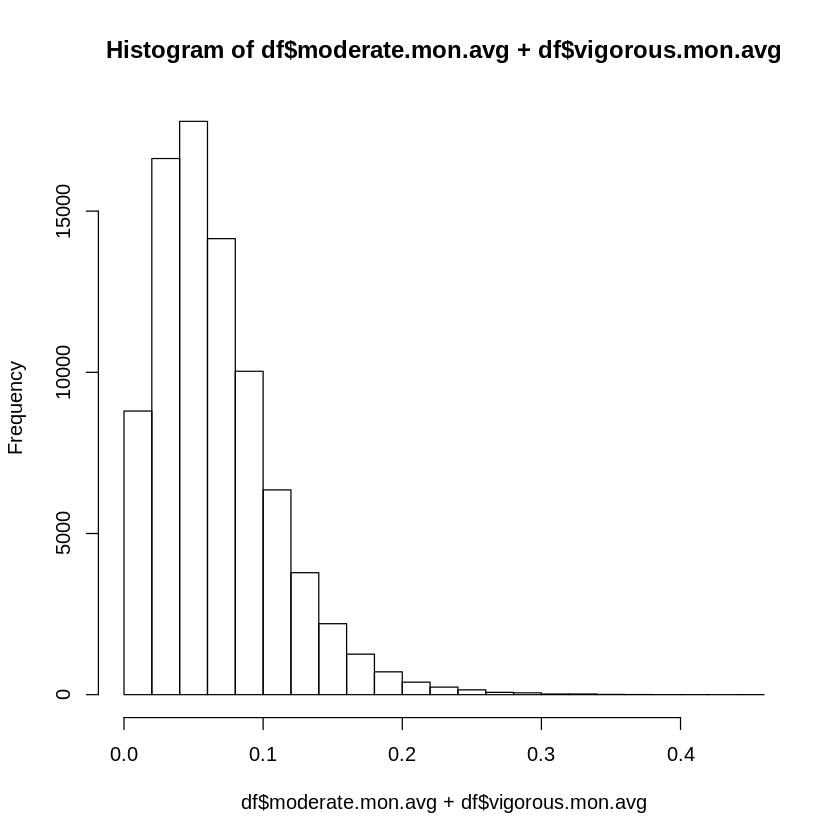

In [117]:
hist(df$moderate.mon.avg + df$vigorous.mon.avg)

In [135]:
df$monsum = ((df$moderate.mon.avg + df$vigorous.mon.avg) > session_threshold)
df$tuesum = ((df$moderate.tue.avg + df$vigorous.tue.avg) > session_threshold)
df$wedsum = ((df$moderate.wed.avg + df$vigorous.wed.avg) > session_threshold)
df$thurdsum = ((df$moderate.thur.avg + df$vigorous.thur.avg) > session_threshold)
df$frisum = ((df$moderate.fri.avg + df$vigorous.fri.avg) > session_threshold)
df$satsum = ((df$moderate.sat.avg + df$vigorous.sat.avg) > session_threshold)
df$sunsum = ((df$moderate.sun.avg + df$vigorous.sun.avg) > session_threshold)

In [136]:
df$session_count = df$monsum+df$tuesum+df$wedsum+df$thurdsum+df$frisum+df$satsum+df$sunsum

In [137]:
head(df[df$active, ]$session_count==1)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [138]:
sum(df$regular_active & df$cvd_event)

[1] 107

In [139]:
sum(df$weekend_warrior & df$cvd_event)

[1] 43

In [134]:
sum(((df$session_count==0)) & df$active)

[1] 0

In [154]:
df$weekend_warrior = ((df$session_count==1) | (df$session_count==2) | (df$session_count==3)) & df$active
df$regular_active =  !df$weekend_warrior & df$active
df$inactive =  !df$active


In [61]:
sum(df$weekend_warrior)

[1] 4604

In [144]:
df$weekend_warrior = ((df$session_count==1) | (df$session_count==2)) & df$active
df$regular_active =  !df$weekend_warrior & df$active
df$inactive =  !df$active

In [ ]:
# grouping 2

In [151]:
df$ginactive = df$session_count==0
df$gweekend_warrior = (df$session_count==1) | (df$session_count==2)
df$gactive =  ((df$session_count==3) | (df$session_count==4) | (df$session_count==5) | (df$session_count==6) | (df$session_count==7))

In [202]:
computeSum <- function(my_dat) {
    n_sub = nrow(my_dat)
    cat('age', mean(my_dat$ageAccInt), sd(my_dat$ageAccInt), '\n')
    cat('Female ', (table(df$sex)['Female']), (table(df$sex)['Female'])/n_sub, '\n')
    cat('Smoking ', (table(df$sex)['Female']), (table(df$sex)['Female'])/n_sub, '\n')
}

In [203]:
table(df$sex)['Female']

Female 
 47755

In [209]:
5620+47754+29004

[1] 82378

In [211]:
is.na(df$smoking)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [208]:
table(df$smoking)


          Current    Never Previous 
     180     5620    47754    29094 

In [205]:
cat(table(df$smoking)['Current'])

5620

In [206]:
computeSum(df)

age 61.54764 7.854576 
Female  47755 0.5778119 


In [168]:
(df$smoking[1:25])

[1] "Never"    "Previous" "Never"    "Never"    "Never"    "Never"   
 [7] "Never"    "Never"    "Never"    "Previous" "Never"    "Current" 
[13] "Never"    "Never"    "Never"    "Current"  "Never"    "Previous"
[19] "Never"    "Never"    "Never"    "Previous" "Never"    "Previous"
[25] "Never"

In [ ]:
df$ageAccInt

In [145]:
sum(df$weekend_warrior)

[1] 1401

In [40]:
sum(is.na(df$inactive))

[1] 0

sum(df$weekend_warrior)

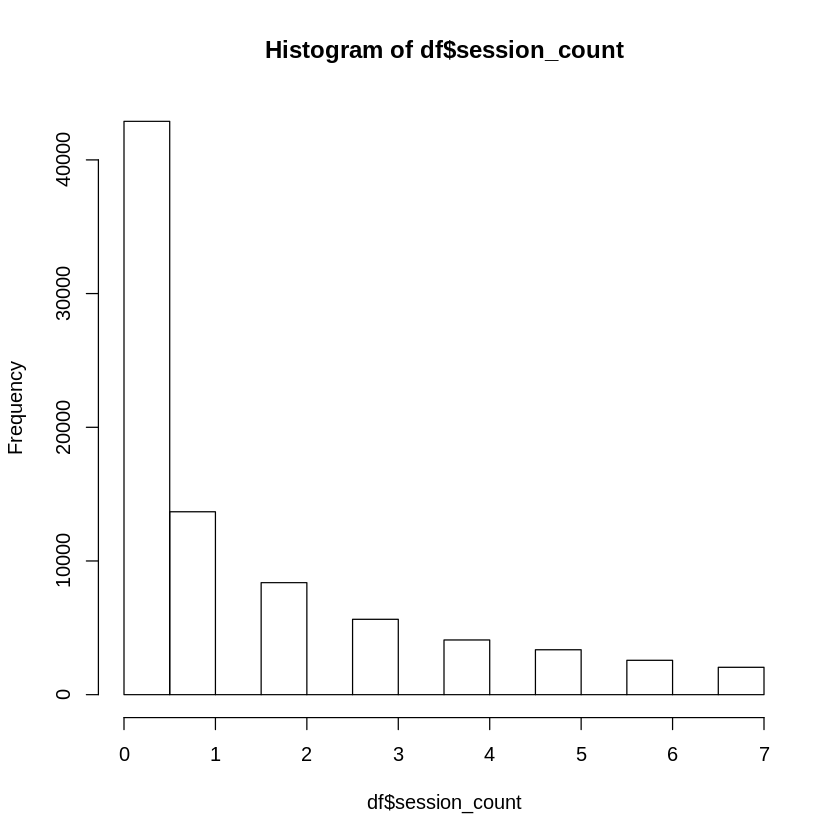

In [149]:
hist(df$session_count)

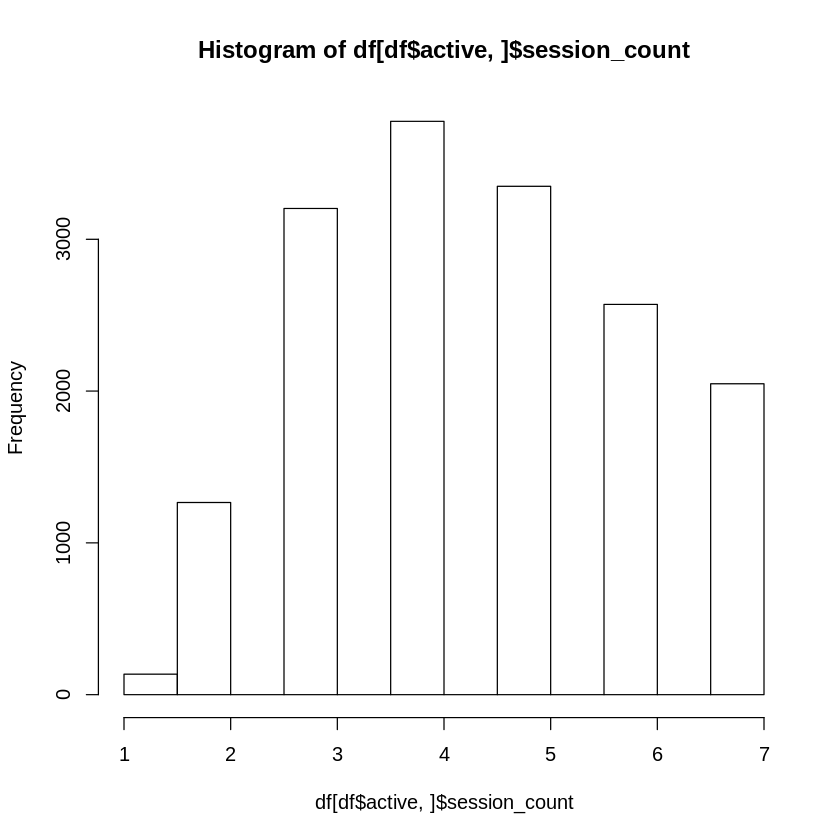

In [148]:
hist(df[df$active,]$session_count)

In [132]:
sum(df[df$active, ]$session_count==1)

[1] 135

In [133]:
sum(df[df$active, ]$session_count==2)

[1] 1266

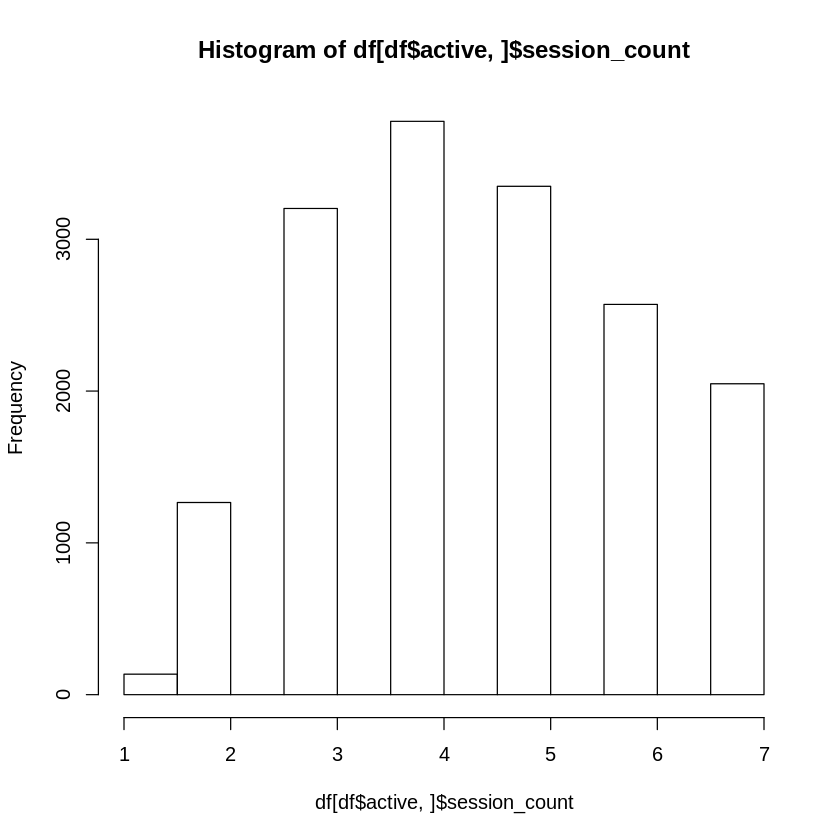

In [78]:
hist(df[df$active, ]$session_count)

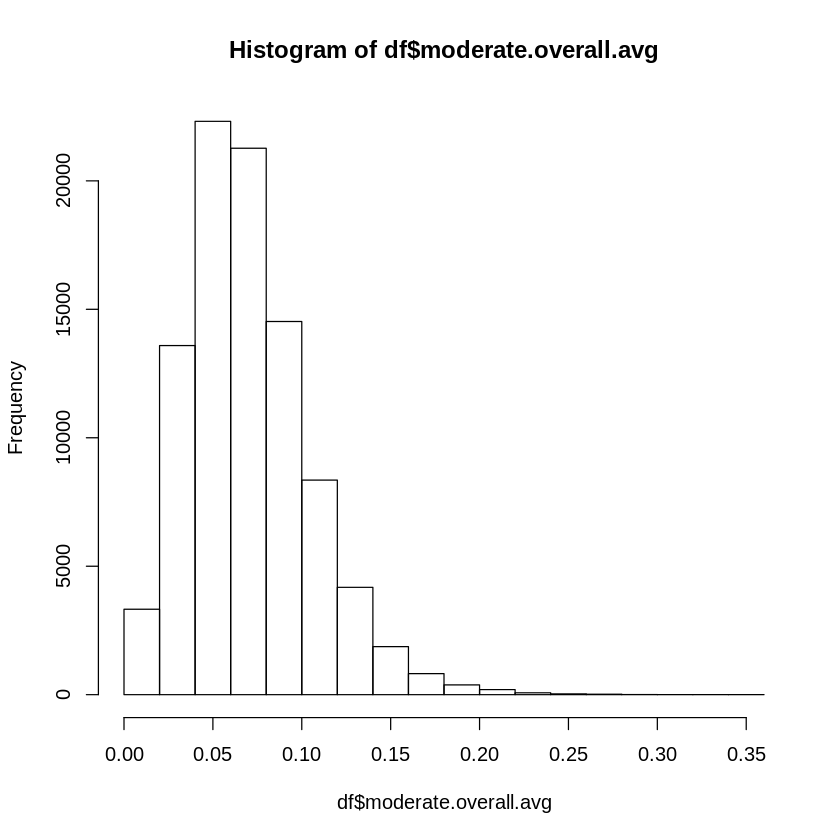

In [35]:
hist(df$moderate.overall.avg)

# Cox 

We use the summary measures to define a measure of weekend-warriorness. 

Note this definition uses the actual weekend- which is not crucial to the definition of the weekend-warrior pattern- and uses the overall activity in the definition of weekend-warriorness. These are both things you might want to change!

We exclude individuals with prevalent cardiovascular disease at baseline. 

We can then set up the Cox model. 

In [140]:
sum(df$weekend_warrior & df$active)

[1] 4604

In [162]:
survival_object <- Surv(df$fu_time, df$cvd_event)
cox_ww <- coxph(survival_object ~ df$overallHealthRating + df$bmi + df$sex + df$weekend_warrior + df$regular_active)
summary(cox_ww)

Call:
coxph(formula = survival_object ~ df$overallHealthRating + df$bmi + 
    df$sex + df$broadAgeGroup * df$weekend_warrior + df$broadAgeGroup * 
    df$regular_active)

  n= 82648, number of events= 1363 

                                                  coef exp(coef)  se(coef)
df$overallHealthRating                        0.360201  1.433617  0.039934
df$bmi                                        0.034720  1.035330  0.005972
df$sexMale                                    0.776423  2.173683  0.056490
df$broadAgeGroup51-60                         0.953286  2.594220  0.198860
df$broadAgeGroup61-70                         1.653092  5.223103  0.189790
df$broadAgeGroup71-80                         2.151553  8.598197  0.193822
df$weekend_warriorTRUE                       -0.324292  0.723039  0.731127
df$regular_activeTRUE                        -0.668402  0.512527  0.533478
df$broadAgeGroup51-60:df$weekend_warriorTRUE -0.412145  0.662228  0.815207
df$broadAgeGroup61-70:df$weekend_warriorT

In [155]:
survival_object <- Surv(df$fu_time, df$cvd_event)
cox_ww <- coxph(survival_object ~ df$overallHealthRating + df$bmi + df$broadAgeGroup + df$sex + df$weekend_warrior + df$regular_active)
summary(cox_ww)

Call:
coxph(formula = survival_object ~ df$overallHealthRating + df$bmi + 
    df$broadAgeGroup + df$sex + df$weekend_warrior + df$regular_active)

  n= 82648, number of events= 1363 

                            coef exp(coef)  se(coef)      z Pr(>|z|)    
df$overallHealthRating  0.359773  1.433004  0.039928  9.010  < 2e-16 ***
df$bmi                  0.034673  1.035281  0.005973  5.805 6.44e-09 ***
df$broadAgeGroup51-60   0.976280  2.654564  0.181286  5.385 7.23e-08 ***
df$broadAgeGroup61-70   1.708620  5.521338  0.173231  9.863  < 2e-16 ***
df$broadAgeGroup71-80   2.202803  9.050348  0.177943 12.379  < 2e-16 ***
df$sexMale              0.776340  2.173504  0.056487 13.744  < 2e-16 ***
df$weekend_warriorTRUE -0.371738  0.689535  0.156030 -2.382  0.01720 *  
df$regular_activeTRUE  -0.295627  0.744065  0.102634 -2.880  0.00397 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                       exp(coef) exp(-coef) lower .95 upper .95
df$overallHealthRating    

In [146]:
survival_object <- Surv(df$fu_time, df$cvd_event)
cox_ww <- coxph(survival_object ~ df$overallHealthRating + df$bmi + df$broadAgeGroup + df$sex + df$weekend_warrior + df$regular_active)
summary(cox_ww)

Call:
coxph(formula = survival_object ~ df$overallHealthRating + df$bmi + 
    df$broadAgeGroup + df$sex + df$weekend_warrior + df$regular_active)

  n= 82648, number of events= 1363 

                            coef exp(coef)  se(coef)      z Pr(>|z|)    
df$overallHealthRating  0.359781  1.433016  0.039929  9.011  < 2e-16 ***
df$bmi                  0.034654  1.035261  0.005973  5.802 6.56e-09 ***
df$broadAgeGroup51-60   0.975859  2.653445  0.181282  5.383 7.32e-08 ***
df$broadAgeGroup61-70   1.708001  5.517921  0.173222  9.860  < 2e-16 ***
df$broadAgeGroup71-80   2.202080  9.043804  0.177930 12.376  < 2e-16 ***
df$sexMale              0.776097  2.172975  0.056481 13.741  < 2e-16 ***
df$weekend_warriorTRUE -0.418315  0.658155  0.290622 -1.439 0.150044    
df$regular_activeTRUE  -0.308944  0.734222  0.091673 -3.370 0.000751 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                       exp(coef) exp(-coef) lower .95 upper .95
df$overallHealthRating    

Let's look at the model summary.

In [164]:
survival_object <- Surv(df$fu_time, df$cvd_event)
cox_ww <- coxph(survival_object ~ df$overallHealthRating + df$bmi + df$broadAgeGroup + df$sex + df$gactive + df$gweekend_warrior)
summary(cox_ww)

Call:
coxph(formula = survival_object ~ df$overallHealthRating + df$bmi + 
    df$broadAgeGroup + df$sex + df$gactive + df$gweekend_warrior)

  n= 82648, number of events= 1363 

                             coef exp(coef)  se(coef)      z Pr(>|z|)    
df$overallHealthRating   0.345594  1.412830  0.040062  8.626  < 2e-16 ***
df$bmi                   0.031961  1.032477  0.006015  5.314 1.07e-07 ***
df$broadAgeGroup51-60    0.966663  2.629157  0.181302  5.332 9.72e-08 ***
df$broadAgeGroup61-70    1.684028  5.387212  0.173346  9.715  < 2e-16 ***
df$broadAgeGroup71-80    2.156828  8.643672  0.178354 12.093  < 2e-16 ***
df$sexMale               0.788633  2.200387  0.056555 13.945  < 2e-16 ***
df$gactiveTRUE          -0.409015  0.664304  0.087160 -4.693 2.70e-06 ***
df$gweekend_warriorTRUE -0.213166  0.808022  0.068282 -3.122   0.0018 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                        exp(coef) exp(-coef) lower .95 upper .95
df$overallHealthRating

This analysis leaves LOTS to be desired: 
* the definition of weekend warrior-ness
* confounding 
* treatment of age as just a covariate? 